In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

# fetch dataset
covertype = fetch_ucirepo(id=31)

# data (as pandas dataframes)
X = covertype.data.features
y = covertype.data.targets

df_combined = X.copy()
df_combined['Cover_Type'] = y['Cover_Type']

# metadata
print(covertype.metadata)

# variable information
print(covertype.variables)

# Check in week 7

We will perform PCA on the dataset.

In [ ]:
# only use numerical columns
X_nums = X[X.columns[:10]]

In [ ]:
# mean of each feature
mean_vector = np.mean(X_nums, axis=0)

# center the data
X_centered = X_nums - mean_vector

# covariance matrix
cov_matrix = np.cov(X_centered, rowvar=False)

# eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# sort eigenvalues and eigenvectors
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

# project onto principal components
Y = X_centered.dot(eigenvectors)

In [ ]:
# variance
explained_var = eigenvalues / eigenvalues.sum()
cumulative_var = np.cumsum(explained_var)
cumulative_var

array([0.66245305, 0.96979011, 0.98750578, 0.99609974, 0.99916751,
       0.99964069, 0.9998877 , 0.99999147, 0.99999947, 1.        ])

### explanation

If you apply PCA to your data, include code, cumulative variability explained, and scree plot. Explain
how you are using PCA in your project for dimensionality reduction or to learn structure in the data.

In our cumulative variance, we can see that by using two principal components, we already have 97% variance which captures a large proportion of our data and any further just captures extra noise.

This means that PC1 and PC2 together retain almost all the essential information and variability of our dataset and can represent an accurate summary of the entire dataset together such as relations, clusters, and patterns.

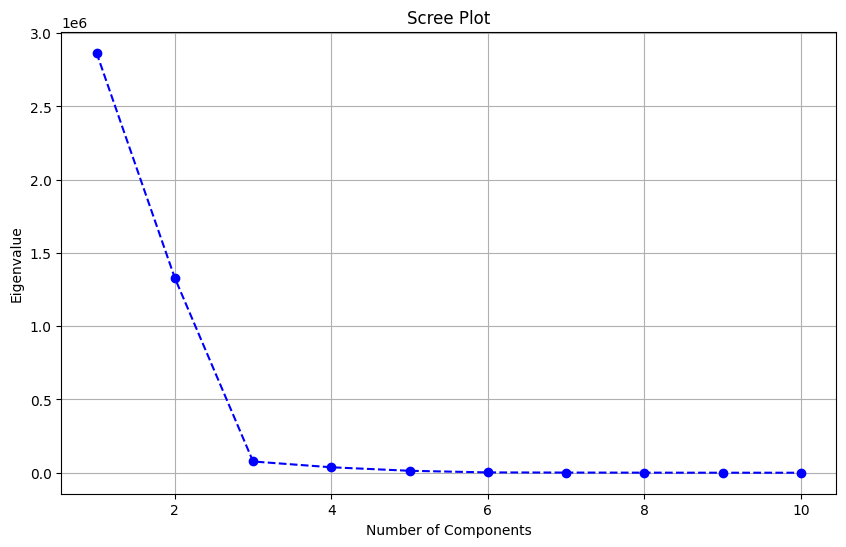

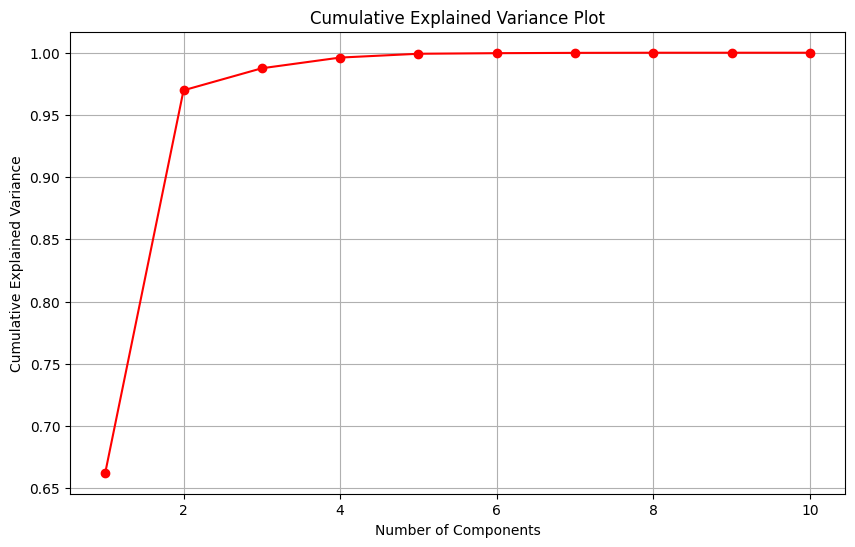

In [ ]:
# Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Components')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

# Cumulative Explained Variance Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_var) + 1), cumulative_var, marker='o', linestyle='-', color='r')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Plot')
plt.grid(True)
plt.show()